To Jingguo：\
我这里会给你一个在mac上anaconda安装环境，下载对应需要的库的一些教程和流程，你到时候跟着操作就好。有的常见的bug，我也会直接提示好。、
1）安装anaconda。anaconda介绍：anaconda就是一个集成的软件包管理和部署系统。很多深度学习相关的python库，R库都可以由anaconda来下载安装，非常方便，便于管理。这里我选了一个镜像网站（就是下载的地址在国内，下载速度相较于国外的源会快很多）
用指令：
~~~bash
wget https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/Anaconda3-5.3.0-MacOSX-x86_64.sh
bash Anaconda3-5.3.0-MacOSX-x86_64.sh
~~~
遇到有什么选项，就按y，然后选默认的安装路径
这里经常会遇到一个anaconda没法打开的bug。我们需要修改环境变量：
~~~bash
sudo vim ~/.bashrc
~~~
添加命令（在任何一行都行）
~~~
export PATH=/home/你的用户名/anaconda3/bin:$PATH
~~~
用vim修改程序：按i是insert，可以修改，按：esc 然后 :wq，是修改并保存。然后就可以了。在输入：
~~~bash
source ~/.bashrc
~~~
查看是否安装好anaconda，你就可以用：
~~~bash
conda init
~~~
创建虚拟环境：
~~~
conda create --name deeplearning python=3.9
~~~
每次进入这个虚拟环境就是：
~~~bash
conda activate deeplearning
~~~

2）安装pytorch。pytorch是一个深度学习平台，为什么需要深度学习平台？我们需要定义一些运算，比方说你知道的卷积，全连接，attention的计算，他会给你封装好。最重要的是在backpropgation，反向传播的时候，求梯度是一个非常麻烦的过程，他需要定义好一些算子来帮忙计算。类似的平台有tensorflow，pytorch，keras等等，不同的平台的非常不一样，我们这里选择pytorch，是facebook（meta前身）开发的。
~~~bash
conda install pytorch torchvision torchaudio -c pytorch
~~~
这样就可以安装好你的pytorch了。
检查是否安装好：
~~~bash
python
~~~
进入你的虚拟环境:
~~~python
import torch
print(torch.__version__)
~~~
如果有类似：1.10.2的输出，那么就是安装成功了

3）安装jupyter notebook。jupyter notebook是一个非常方便调试轻量级的ide，对于断点debug非常方便。但是对于工程量非常大的工程级代码不太适合。这边安装方法是：
~~~bash
conda install jupyter notebook
~~~
然后在你的窗口里输入：
~~~bash
jupyter notebook
~~~
就可以打开jupyter文件了，可以运行block。之后就可以运行我写的脚本了，一个一个block运行就好

4) 安装一些可能需要的库：
~~~bash
pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple
~~~
如果有遇到任何，“no module XXX”的错误，基本上都可以用：
~~~bash
pip install xxx -i https://pypi.tuna.tsinghua.edu.cn/simple
~~~
就可以搞定了
这里也可以用vscode的jupyternotebook的插件来跑，都行。你看看怎么方便怎么来






In [4]:
# 引入一些头文件
import torch
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 深度学习的pipeline
一个深度学习的pipeline

In [5]:
# 定义数据集
data_train = datasets.MNIST(
    root='./data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
data_test = datasets.MNIST(
    root='./data/',
    transform=transforms.ToTensor(),
    train=False,
)

# 这两句指令，下载一个叫mnist的手写数字数据集，我们到时候用这个数据集来做数字分类，也即输入一个图片
# 然后判断他是数字0-9的哪一个

In [6]:
# 接下来进行装在数据的操作
# 因为deeplearning的数据量会非常大，那么我们就需要有一个高效的数据提取器
# pytorch里面有一个叫数据迭代器，dataloader的东西：
data_loader_train = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=64,
    shuffle=True,
)
data_loader_test = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=64,
    shuffle=True,
)
print("total training images: ", len(data_train))
print("total testing image: ", len(data_test))

total training images:  60000
total testing image:  10000


ground truth label is:  [tensor(0), tensor(3), tensor(6), tensor(2), tensor(7), tensor(4), tensor(4), tensor(8), tensor(6), tensor(0), tensor(0), tensor(6), tensor(6), tensor(7), tensor(4), tensor(2), tensor(1), tensor(2), tensor(4), tensor(6), tensor(6), tensor(2), tensor(6), tensor(4), tensor(6), tensor(9), tensor(1), tensor(5), tensor(1), tensor(6), tensor(0), tensor(2), tensor(1), tensor(4), tensor(5), tensor(5), tensor(3), tensor(3), tensor(0), tensor(6), tensor(7), tensor(9), tensor(6), tensor(1), tensor(2), tensor(8), tensor(5), tensor(5), tensor(1), tensor(4), tensor(3), tensor(6), tensor(8), tensor(4), tensor(3), tensor(5), tensor(4), tensor(5), tensor(5), tensor(0), tensor(3), tensor(2), tensor(1), tensor(2)]


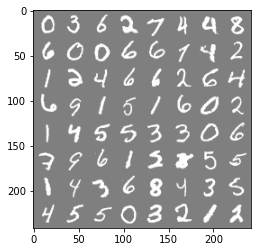

In [7]:
# 我们可视化一下，我们的数据
images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print("ground truth label is: ",[labels[i] for i in range(64)])
plt.imshow(img)

In [8]:
# 这里就是定义网络，我们最关心的部分
# 我们要定义一个卷积神经网络来判断
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 这里是我们预先定义一些layer（计算），比方说conv是convolution的简称，代表卷积层
        # linear是线性，是矩阵乘法的意思
        # dropout是中文我忘了。。。用处在于去掉一些神经元，来达到减少过拟合
        # maxpool是maximum pooling，池化，代表取出一个小局部的最大元素的意思，可以减小图像的size
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.activation = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear1 = torch.nn.Linear(in_features=14*14*128, out_features=1024, bias=True)
        self.linear2 = torch.nn.Linear(in_features=1024, out_features=10, bias=True)
        self.dropout = torch.nn.Dropout(p=0.5)
    
    # 定义好一些计算层layer，我们就可以开始做前向传播forward propagation了，也就是一个input x
    # 如何通过一个网络计算得到一个我们想要的输出
    def forward(self, x: torch.Tensor):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.maxpool(x)
        x = x.reshape(-1, 14*14*128)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x

In [14]:
# 定义好网络之后，我们就可以开始训练了：
model = CNNModel() # 实例化网络
loss_function = torch.nn.CrossEntropyLoss() # 定义我们的loss function，这里用交叉熵，是分类任务常用的一种
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01) 
# optimizer是用来计算梯度的，也就是说，我们在backpropagation
# 的时候需要有一个函数来计算每个weight的梯度是多少，然后根据学习率learning rate来计算
print(model)

CNNModel(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): ReLU()
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=25088, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [16]:
# 开始训练：
num_epochs = 1
epoch_loss_list = []
# if torch.cuda.is_available():
    # model = model.cuda()
model = model.cpu()
for epoch in range(num_epochs):
    train_loss = .0
    train_correct = .0
    print(f"Epoch {epoch+1}/{num_epochs} ")
    for data in data_loader_train:
        x_train, y_train = data
        # if torch.cuda.is_available():
            # x_train, y_train = x_train.cuda(), y_train.cuda()
        outputs = model(x_train)
        _, pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_correct += torch.sum(pred == y_train.data)
    epoch_loss_list.append(train_loss)
    test_correct = .0
    for data in data_loader_test:
        x_test, y_test = data
        # if torch.cuda.is_available():
            # x_test, y_test = x_test.cuda(), y_test.cuda()
        outputs = model(x_test)
        _, pred = torch.max(outputs.data, 1)
        test_correct += torch.sum(pred==y_test.data)
    print(f"Train Loss {train_loss/num_epochs}, \
        Train Accuracy {train_correct/len(data_train)},\
        Test Accuracy {test_correct/len(data_test)}")

Epoch 1/1 
Train Loss 117.73869564011693,         Train Accuracy 0.9622833132743835,        Test Accuracy 0.9692999720573425


tensor([7, 3, 8, 6, 7], device='cuda:0')
Predict label is:  [tensor(7), tensor(3), tensor(8), tensor(6), tensor(7)]
Ground Truth label is:  [tensor(7), tensor(3), tensor(8), tensor(6), tensor(7)]


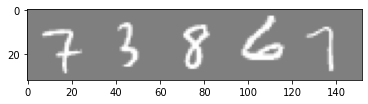

In [11]:
dataloader_test = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=5,
    shuffle=True
)
x_test, y_test = next(iter(dataloader_test))
if torch.cuda.is_available():
    x_test, y_test = x_test.cuda(), y_test.cuda()
pred = model(x_test)
_, pred = torch.max(pred, 1)
print(pred)
print(f"Predict label is: ", [i for i in pred.cpu()])
print(f"Ground Truth label is: ", [i for i in y_test.cpu()])

img = torchvision.utils.make_grid(x_test.cpu())
img = img.numpy().transpose(1,2,0)
std = [0.5, 0.5, 0.5]
mean = [0.5, 0.5, 0.5]
img = img*std + mean
plt.imshow(img)